In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

2024-03-25 05:54:08.542399: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 05:54:08.542512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 05:54:08.542586: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 05:54:08.559655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data = pd.read_csv('./Dataset/sign_mnist_train/sign_mnist_train.csv')
print(train_data.head())
print(train_data.shape)

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [3]:
input_shape = (28, 28, 1)

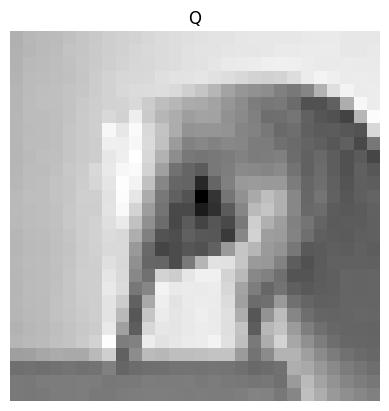

In [4]:
# display random image

import random
import matplotlib.pyplot as plt

def display_random_image():
    random_index = random.randint(0, train_data.shape[0])
    image = train_data.iloc[random_index, 1:].values.reshape(input_shape)
    plt.imshow(image, cmap='gray')
    plt.title(chr(train_data.iloc[random_index, 0] + 65))
    plt.axis('off')
    plt.show()

display_random_image()

In [5]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

print(X_train.shape, y_train.shape)

(27455, 784) (27455,)


In [6]:
x_train = X_train.values.reshape(-1, 28, 28, 1)
print(x_train.shape)

(27455, 28, 28, 1)


In [7]:
model = None

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       7

2024-03-25 05:54:14.785899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (100)


 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 64)          0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 26)                13338     
                                                                 
Total params: 195930 (765.35 KB)
Trainable params: 195418 (763.35 KB)
Non-trainable params: 512 (2.00 KB)
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=8, validation_split=0.2, batch_size=16)

Epoch 1/8


2024-03-25 05:54:15.179658: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 137758208 exceeds 10% of free system memory.


1373/1373 [==============================] - 51s 36ms/step - loss: 0.8521 - accuracy: 0.7281 - val_loss: 0.5725 - val_accuracy: 0.8040
Epoch 2/8
1373/1373 [==============================] - 54s 39ms/step - loss: 0.1840 - accuracy: 0.9392 - val_loss: 0.0639 - val_accuracy: 0.9823
Epoch 3/8
1373/1373 [==============================] - 47s 34ms/step - loss: 0.1079 - accuracy: 0.9640 - val_loss: 0.1979 - val_accuracy: 0.9352
Epoch 4/8
1373/1373 [==============================] - 53s 38ms/step - loss: 0.0815 - accuracy: 0.9727 - val_loss: 0.2064 - val_accuracy: 0.9293
Epoch 5/8
1373/1373 [==============================] - 52s 38ms/step - loss: 0.0659 - accuracy: 0.9784 - val_loss: 0.0163 - val_accuracy: 0.9978
Epoch 6/8
1373/1373 [==============================] - 56s 41ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.1619 - val_accuracy: 0.9514
Epoch 7/8
1373/1373 [==============================] - 52s 38ms/step - loss: 0.0475 - accuracy: 0.9842 - val_loss: 0.3648 - val_accuracy: 0.

Text(0, 0.5, 'Accuracy')

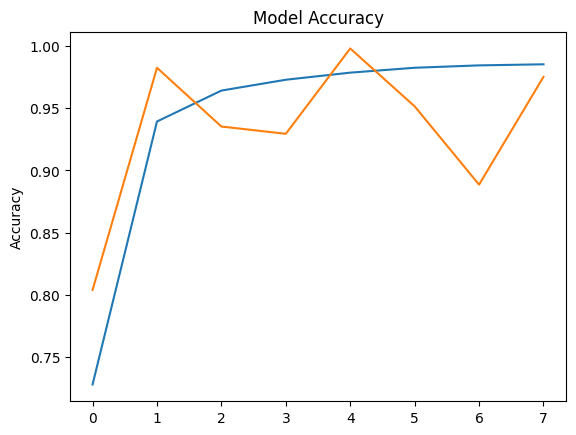

In [10]:
# plot the training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

In [11]:
test_data = pd.read_csv('./Dataset/sign_mnist_test/sign_mnist_test.csv')

y_test = test_data['label']
X_test = test_data.drop('label', axis=1)

x_test = X_test.values.reshape(-1, 28, 28, 1)

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

225/225 [==============================] - 3s 15ms/step - loss: 0.4355 - accuracy: 0.8728
Test loss: 0.435541570186615, Test accuracy: 0.8728387951850891


In [21]:
x_test = train_data
x_test = x_test.drop('label', axis=1)

x_test = x_test.values.reshape(-1, 28, 28, 1)

print(x_test.shape)

(27455, 28, 28, 1)


(28, 28, 1)
G


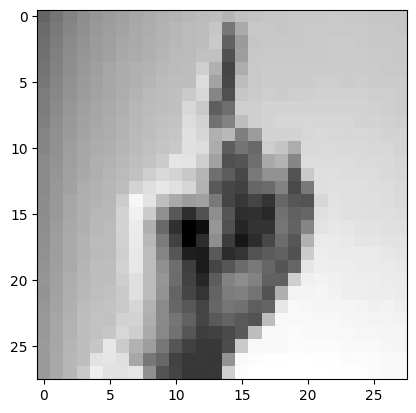

(28, 28, 1)
F


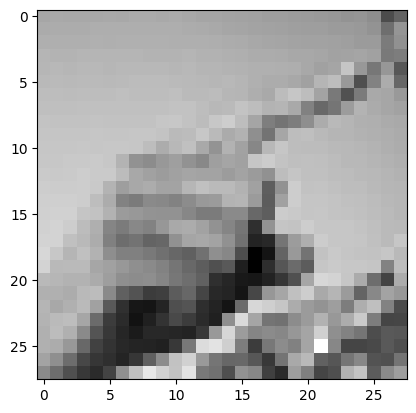

(28, 28, 1)
K


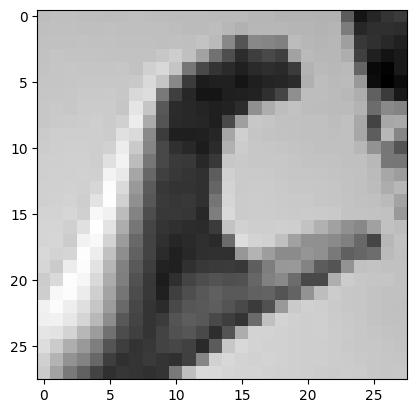

(28, 28, 1)
A


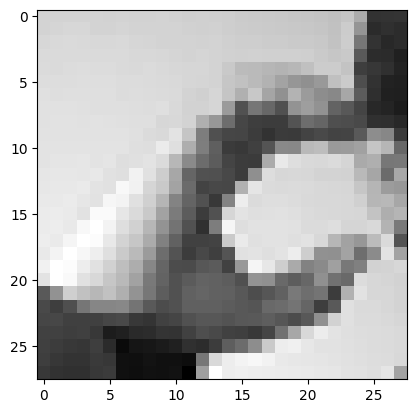

(28, 28, 1)
D


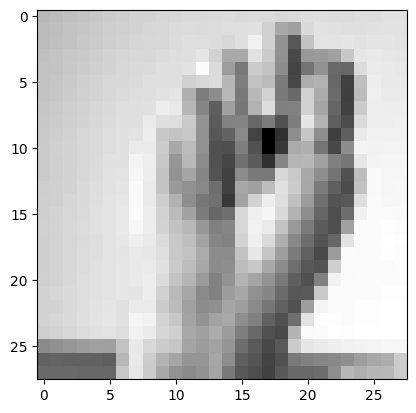

(28, 28, 1)
V


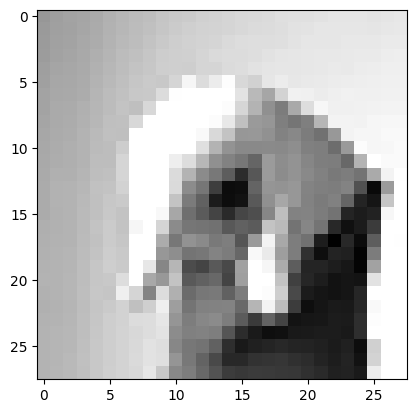

(28, 28, 1)
K


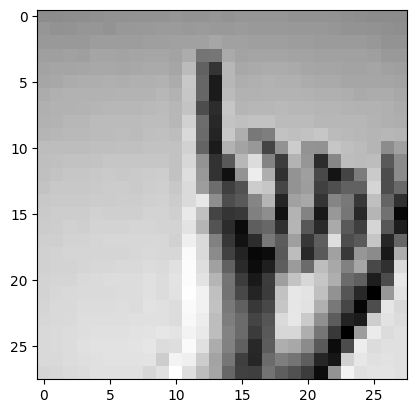

(28, 28, 1)
O


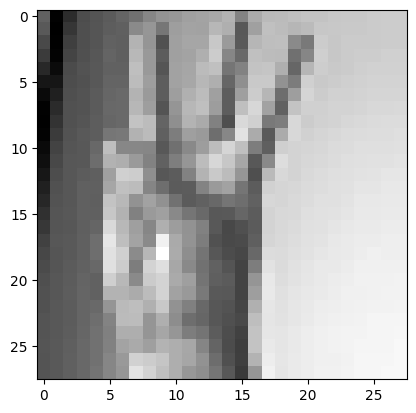

(28, 28, 1)
D


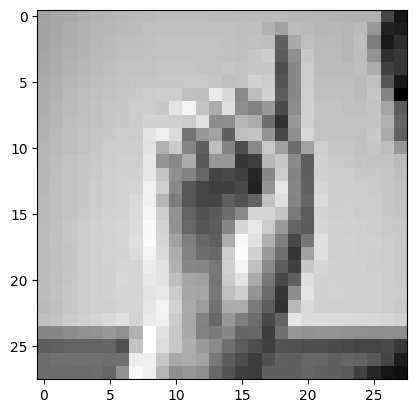

(28, 28, 1)
H


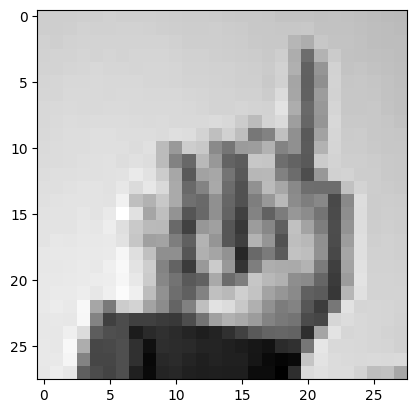

In [33]:
# save 10 images from test data as .jpg files
import os
from matplotlib import image

def save_images():
    for i in range(10):
        image = x_test[i].reshape(28, 28,1)
        print(image.shape)
        label = chr(test_data.iloc[i, 0] + 65) # convert label to alphabet
        print(label)
        plt.imshow(image, cmap='gray')
        # plt.title(label)
        # plt.axis('off')

        image_path = os.path.join('./images', f'{label}.jpg')
        os.makedirs(os.path.dirname(image_path), exist_ok=True)
        plt.savefig(image_path)
        plt.show()
        
save_images()

In [14]:
# predict funtion

# def predict_image(image_path):
    